<a href="https://colab.research.google.com/github/timothykmulenga/profile_projects/blob/master/Create_my_own_dataset_with_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Creating your own dataset from Google Images

As a Formular 1 support, i have choosen to scrape images of popular F1 teams in specific to their cars. 
This include:
**Mercedes, Ferrari, Redbull, Renault, Mclaren and Haas**





## Get a list of URLs


Search and scroll
Go to Google Images and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

"canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

## Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press CtrlShiftj on Windows/Linux and CmdOptj on macOS, and a small window the javascript 'Console' will appear. In Firefox press CtrlShiftk on Windows/Linux or CmdOptk on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:




```
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```




# Create directory and upload urls file into your server

In [0]:
from fastai.vision import * # importing libraries
from fastai import *

In [0]:

folder = 'ferrari'
file = '/content/drive/My Drive/Colab Notebooks/New Folder/ferrari.txt'

In [0]:
folder = 'mclaren'
file = '/content/drive/My Drive/Colab Notebooks/New Folder/mclaren.txt'

In [0]:
folder = 'mercedes'
file = '/content/drive/My Drive/Colab Notebooks/New Folder/mercedes.txt'

In [0]:
folder = 'redbull'
file = '/content/drive/My Drive/Colab Notebooks/New Folder/redbull.txt'

In [0]:
folder = 'renault'
file = '/content/drive/My Drive/Colab Notebooks/New Folder/renault.txt'

In [0]:
folder = 'haas'
file ='/content/drive/My Drive/Colab Notebooks/New Folder/haas.txt'

In [0]:
path = Path('/content/drive/My Drive/Colab Notebooks/New Folder/formula1')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ["ferrari", 'mclaren','mercedes', 'redbull', 'renault', 'haas']

Then we can remove any images that can't be opened:

In [24]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

ferrari


mclaren


mercedes


redbull


renault


haas


#VIEW DATA

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


Good! Let's take a look at some of our pictures then.

In [26]:
data.classes

['ferrari', 'haas', 'mclaren', 'mercedes', 'redbull', 'renault']

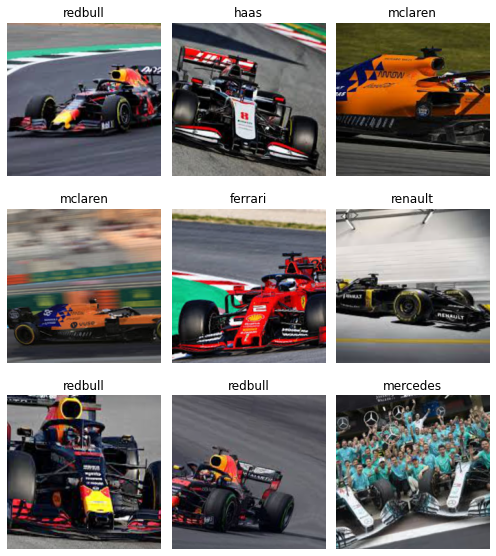

In [27]:
data.show_batch(rows=3, figsize=(7,8))

In [28]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ferrari', 'haas', 'mclaren', 'mercedes', 'redbull', 'renault'], 6, 384, 96)

# Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, callback_fns=ShowGraph)

epoch,train_loss,valid_loss,accuracy,time
0,2.986161,2.273242,0.187500,00:05
1,2.438600,0.909563,0.729167,00:05
2,1.893296,0.687918,0.760417,00:05
3,1.483968,0.737186,0.750000,00:05
4,1.236257,0.791286,0.760417,00:05
5,1.056200,0.776381,0.791667,00:05
6,0.925948,0.731556,0.802083,00:05
7,0.807116,0.732936,0.802083,00:05
8,0.729695,0.706751,0.802083,00:05
9,0.669487,0.701956,0.812500,00:05


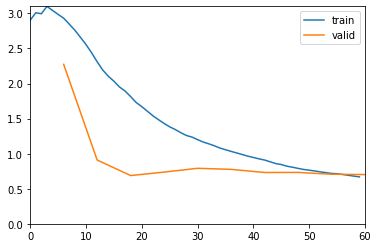

In [33]:
learn.fit_one_cycle(10)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


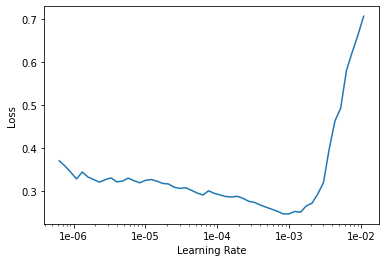

In [37]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.385808,0.647088,0.854167,00:05
1,0.296689,0.638404,0.843750,00:05


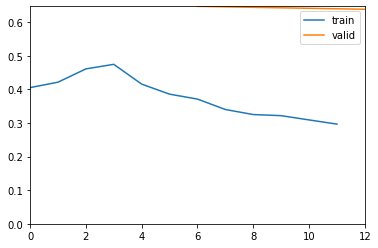

In [38]:

learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-03))

In [0]:
learn.save('stage-2')

# Interpretation

In [0]:
learn.load('stage-2');

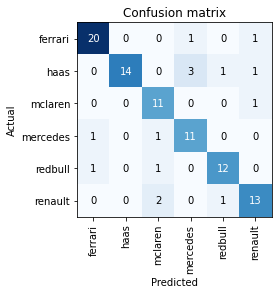

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()